# Decision Trees - Entscheidungsbäume

Wir wollen zuerst das Beispiel aus dem Datensatz "Tennis" nachvollziehen. Anhand historischer Daten wollen wir vorhersagen, ob ein fiktiver Tennis-Spieler Tennis spielt oder nicht. Als Features fließen dabei die **Witterung**, die **Temperatur**, die **Luftfeuchtigkeit** sowie der **Wind** ein. Die Spalte **TennisGespielt** sagt uns, ob er Tennis gespielt hat (1) oder nicht (0). Wir laden den Datensatz und geben ihn aus:

In [69]:
import pandas as pd
url="https://raw.githubusercontent.com/troescherw/datasets/master/tennis.csv"
df = pd.read_csv(url, delimiter=";")
df

,Witterung,Temperatur,Luftfeuchtigkeit,Windig,TennisGespielt
0,Regnerisch,Heiß,Hoch,Nein,0
1,Regnerisch,Heiß,Hoch,Ja,0
2,Bedeckt,Heiß,Hoch,Nein,1
3,Sonnig,Mild,Hoch,Nein,1
4,Sonnig,Kalt,Normal,Nein,1
5,Sonnig,Kalt,Normal,Ja,0
6,Bedeckt,Kalt,Normal,Ja,1
7,Regnerisch,Mild,Hoch,Nein,0
8,Regnerisch,Kalt,Normal,Nein,1
9,Sonnig,Mild,Normal,Nein,1


Wir teilen den Datensatz auf in Prädiktoren (X) und in das Kriterium (y).

In [70]:
X = df.iloc[:, :4]
y = df.TennisGespielt

Die kategorialen Variablen ersetzen wir durch Dummy-Variablen:

In [71]:
X = pd.get_dummies(X)

Wir erstellen das Modell (Entscheidungsbaum) und trainieren den Baum mit den vorliegenden Daten. Aufgrund der geringen Anzahl an Beobachtungen verzichten wir hier auf die Aufteilung und Trainings- und Testdaten.

In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0, criterion="entropy").fit(X,y)

print(X)

    Witterung_Bedeckt  Witterung_Regnerisch  Witterung_Sonnig  \
0                   0                     1                 0   
1                   0                     1                 0   
2                   1                     0                 0   
3                   0                     0                 1   
4                   0                     0                 1   
5                   0                     0                 1   
6                   1                     0                 0   
7                   0                     1                 0   
8                   0                     1                 0   
9                   0                     0                 1   
10                  0                     1                 0   
11                  1                     0                 0   
12                  1                     0                 0   
13                  0                     0                 1   

    Temperatur_Heiß  Tem

Wir plotten den Baum mit Hilfe der Funktion *plot_tree*. Wir übergeben hierfür das Modell, die Spaltennamen in der Reihenfolge des Trainings-Datensatzes und die Klassennamen in der Reihenfolge 0,1,... (hier: 0 = "Tennis nicht gespielt", 1="Tennis gespielt").

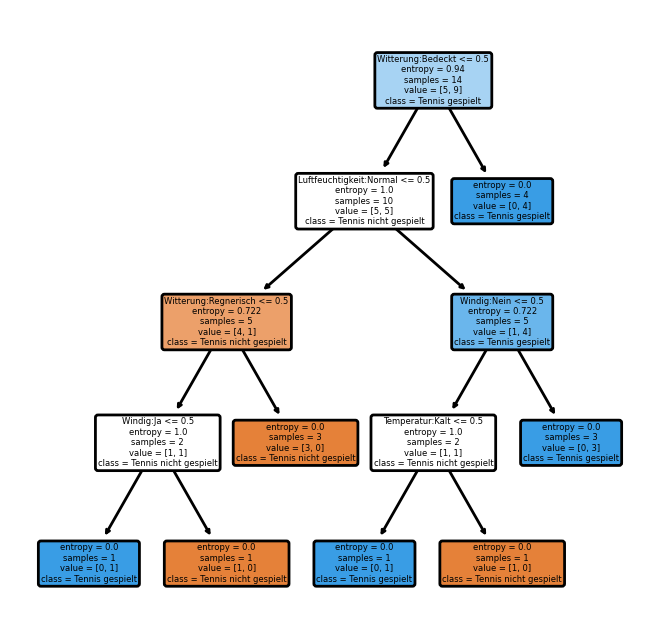

In [74]:
from sklearn import tree

import matplotlib.pyplot as plt
fn=['Witterung:Bedeckt', 'Witterung:Regnerisch','Witterung:Sonnig', 'Temperatur:Heiß','Temperatur:Kalt', 
    'Temperatur:Mild','Luftfeuchtigkeit:Hoch', 'Luftfeuchtigkeit:Normal', 'Windig:Ja', 'Windig:Nein']
cn=['Tennis nicht gespielt', 'Tennis gespielt']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
_=tree.plot_tree(model, feature_names = fn, class_names=cn, filled = True, rounded=True)

Mit dem Modell können wir eine Vorhersage durchführen und die Ergebnisse der Vorhersage (prediction) mit den realen Daten vergleichen.

In [31]:
pred = model.predict(X)

Wir können nun die vorhergesagten Daten mit der Realität (den Daten in y) tabellarisch gegenüberstellen. Diese Tabelle nennt man **Confusion Matrix**. In der Diagonalen finden wir die richtig vorhergesagten Klassen (also 0 oder 1). Wir stellen fest, dass unser Modell immer richtig lag! Allerdings ist das nicht wirklich aussagekräftig, da wir mit denselben Daten unser Modell testen, mit denen wir auch unser Modell trainiert haben!


In [32]:
pd.crosstab(pred,y)

TennisGespielt,0,1
row_0,,
0,5,0
1,0,9


## Entscheidungsbaum mit dem IRIS-Datensatz
Wir erstellen einen Entscheidungsbaum mit dem IRIS-Datensatz.

Beim Iris Datensatz handelt es sich um einen Datensatz mit 150 Beobachtungen von 4 Features von Schwertlilien. Gemessen wurden dabei jeweils die Breite und die Länge des Kelchblatts (Sepal) sowie des Kronblatts (Petal). Des weiteren ist für jeden Datensatz die Art der Schwertlilie (Setosa, Virginica, Versicolor) angegeben. Für jede Spezies liegen 50 Messungen vor.

Wir laden den Datensatz und geben die ersten 5 Zeilen aus.

In [33]:
import pandas as pd

url  = "https://raw.githubusercontent.com/troescherw/datasets/master/iris.csv"
iris = pd.read_csv(url, delimiter=";")

iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,SpeciesID
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


Wir teilen den Datensatz wieder bzgl. der Features auf: Prädiktoren X und Kriterium y:

In [34]:
X = iris.iloc[:,:4]
y = iris.SpeciesID

Wir teilen den Datensatz bzgl. der Beobachtungen auf: Einen Datensatz mit 70% der Daten verwenden wir für das Training des Modells, mit den verbleibenden 30% der Daten überprüfen wir die Qualität unseres Modells.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   shuffle=True,
                                                   random_state=1,
                                                   test_size=0.3)

Nun erstellen wir unseren Entscheidungsbaum mit Hilfe des Train-Datensatzes

In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3,
                              criterion="entropy").fit(X_train, y_train)

Wir plotten wie oben unseren Entscheidungsbaum:

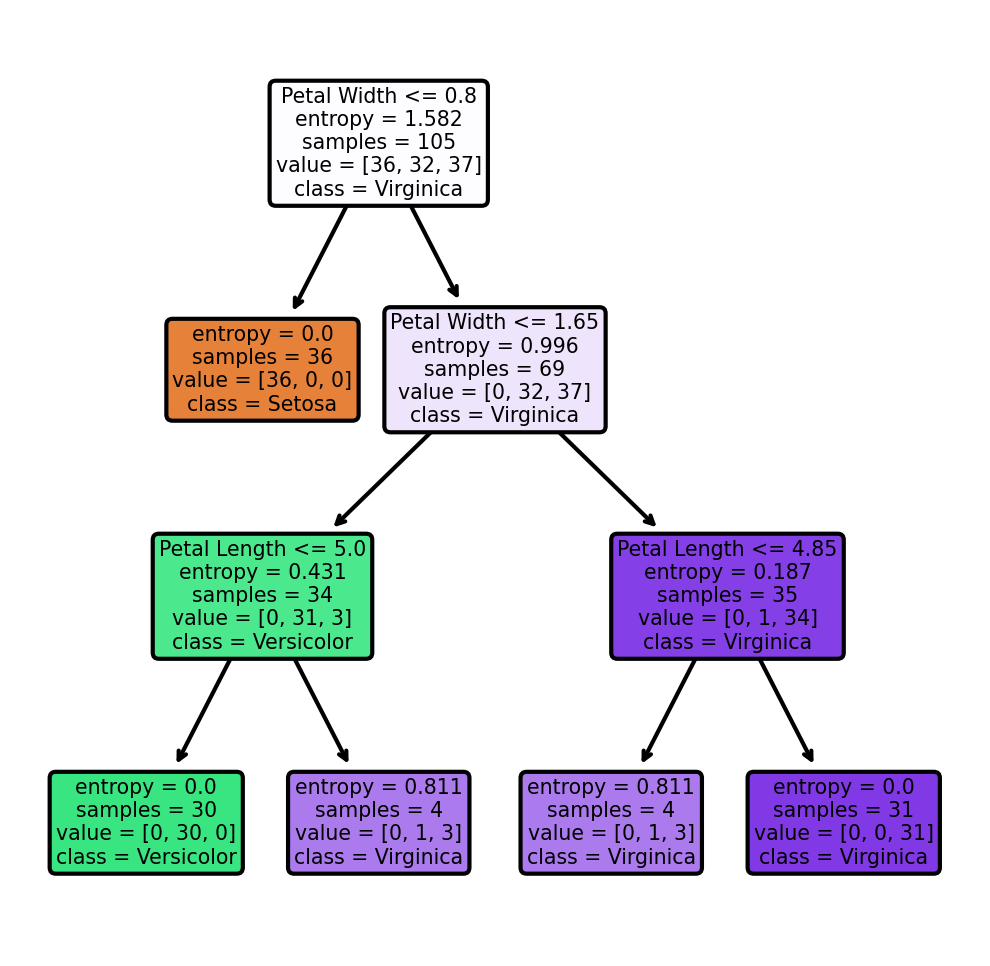

In [37]:
from sklearn import tree

import matplotlib.pyplot as plt
fn=["Sepal Length","Sepal Width","Petal Length","Petal Width"]
cn=['Setosa', 'Versicolor', 'Virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
_=tree.plot_tree(model, feature_names = fn, class_names=cn, filled = True, rounded=True)

Wir erstellen mit unserem Entscheidungsbaum eine Vorhersage und verwenden hierfür den Test-Datensatz.

In [38]:
pred = model.predict(X_test)

Wir stellen die Vorhersage (pred) mit der Realiät (y_test) wieder tabellarisch in einer **Confusion Matrix** gegenüber. In dieser Matrix stehen wieder die richtig vorhergesagten Klassen (hier also Versicolor, Verginica oder Versicolor) in der Diagnoalen.

In [39]:
ytest_labels = y_test.replace([0,1,2], ["Setosa","Versicolor","Virginica"])
pred_labels = pd.Series(pred).replace([0,1,2], ["Setosa","Versicolor","Virginica"])

pd.crosstab(pred_labels, ytest_labels.values,
           rownames=["Predicted"],
           colnames=["Reference"])

Reference,Setosa,Versicolor,Virginica
Predicted,,,
Setosa,14,0,0
Versicolor,0,17,1
Virginica,0,1,12


Wie "gut" ist nun unser Modell? In der Diagonale stehen wieder die richtig vorhergesagten Spezies. Insgesamt wurden also 14 + 17 + 12 = 43 Spezies richtig vorhergesagt. Bei 2 Vorhersagen versagte unser Modell: Statt Versicolor wurde eine Virginica, statt eine Virginica wurde eine Versicolor vorhergesagt. In 43 von 45 Fällen lag das Modell aber richtig, das entspricht 96%. Dieser Wert wird **Accuracy** genannt.

Mit Hilfe der Funktion *classification_report* können wir neben der Accuracy auch noch weitere Kennzahl ausgeben, die im zugehörigen Skript ausführlich erläutert werden.

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Visualisierung mit Hilfe der PCA
Wir wollen nun die IRIS-Daten noch visualisieren. Problem: Wir haben 4 Features, die die Spezies bestimmen. Somit müssten wir 4 Dimensionen plotten, was natürlich nicht möglich ist.

Hier hilft die **PCA**, die **Principal Component Analysis** (Hauptkomponentenanalyse). Mit Hilfe von mathematischen Verfahren, auf die wir hier nicht näher eingehen werden, reduziert die PCA die Anzahl der Dimensionen, indem durch Linearkombination mehrere Vektoren zu jeweils einem Vektor (der Hauptkomponente) zusammengefasst werden.

Um das Vorgehen zu verdeutlichen, laden wir (nochmal) den IRIS-Datensatz. Die Labels laden wir gesondert in die Variable gleichen Namens.



In [41]:
import pandas as pd
url = "https://raw.githubusercontent.com/troescherw/datasets/master/iris.csv"
iris = pd.read_csv(url, delimiter=";", usecols=[0,1,2,3])
labels = pd.read_csv(url, delimiter=";", usecols=[4])

Um eine PCA durchzuführen, sollten die Werte immer standardisiert werden, damit kein Feature über- oder untergewichtet in die Berechnung eingeht. Wir erledigen dies mit Hilfe von *StandardScaler*.

In [42]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(iris)

Nun können wir die PCA durchführen. Wir können hier einen 3D-Plot erstellen, deshalb reduzieren wir die 4 Dimensionen auf 3.

In [43]:
from sklearn.decomposition import PCA
iris_pca = PCA(n_components=3).fit_transform(iris_scaled)


Nun können wir diese 3 Features in einem interaktiven 3D-Plot visualisieren.

**Hinweis**: Falls ihr dieses Notebook auf *Google Colab* ausführt, wird ggf. keine Grafik angezeigt! Um das Problem zu lösen, die erste Zeile von *%matploblib notebook* in *%matplotlib inline* ändern. Allerdings ist die dargestellte 3D-Grafik dann nicht interaktiv.

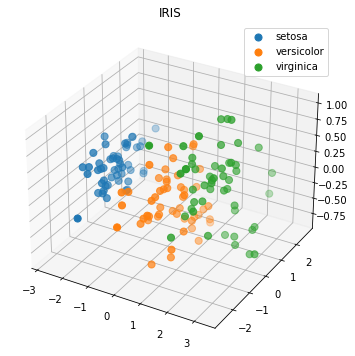

In [44]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111, projection="3d")

iris_pca = PCA(n_components=3).fit_transform(iris_scaled)
for species in labels.Species.unique():
    ax.scatter( iris_pca[labels.Species==species][:,0], 
                iris_pca[labels.Species==species][:,1],
                iris_pca[labels.Species==species][:,2],
                s=50,
                label=species)
plt.title("IRIS")
plt.legend()
plt.draw()

Um eine interaktive Grafik zu erhalten, folgenden Code ausführen. Damit dieser Code auch lokal ausführbar ist (Anaconda-Installation), muss vorher das Package *plotly* installiert werden. Dazu in der Anaconda-Shell *conda install -c plotly plotly* ausführen! Mit der Maus kann man nun interaktiv die Darstellung der Grafik beeinflussen.

In [59]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In beiden Diagrammen gut zu erkennen: Die Spezies Setosa ist deutlich von den anderen beiden Spezies separiert, sodass unserem modell eine Klassifizierung der Setosas sehr leicht fällt. Bei Virginica und Versicolor hingegen gibt es einen überlappenden Bereich, sodass unser Modell hier Fehler macht.